# Implementation of a Convolutional Neural Network

Author: **Duncan Kirby**

Adapted from Erick Spence's lectures ["Introduction to Neural Network programming"](https://support.scinet.utoronto.ca/education/go.php/363/index.php)

[The overview](#linkOverview)   
[Example 1: Feed-Forward Neural Network](#linkffnn)  
[Example 2: Convolutional Neural Network](#linkcnn)  


<a id='linkOverview'></a>
**Given:** 2D images, each image belonging to a single class.

**Need:** To build a model that can predict a class for a new image

**Remember:** CNNs are built on the idea of recognizing the existence of many different features throughout an image.

### In this notebook we will implement:
- a simple neural network in Keras, to try and classify images 
- a convolutional neural network with 5 layers (one input layer, one layer of filters, one layer of max pooling, one deeply connected layer, and one output layer).

#### Architecture and hyperparameters: 
- Activation function: ReLU: $\sigma\left(z\right) = max(0,x)$
- Cost function: cross-entropy 

## Example 1: <a id='linkffnn'></a>

### A Simple Feed Forward NN

In [45]:
import numpy as np 
import matplotlib.pyplot as plt
import keras.models as km
import keras.layers as kl
import keras.utils as ku

In [46]:
plt.rcParams['figure.dpi'] = 90
plt.rcParams['figure.figsize'] = (6,5)

#### Import our data
##### The CIFAR10 data set is a series of images in the categories:
* airplanes
* cars
* birds
* cats
* deer
* dogs
* frogs
* horses
* ships
* trucks

In [47]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print("Each image is {} pixels".format(np.shape(x_train[4])))
print("There are {} images in the training set, with {} labels".format(len(x_train), len(y_train)))

Each image is (32, 32, 3) pixels
There are 50000 images in the training set, with 50000 labels


##### Let's take a peek at our data to see what it looks like

Ground truth: [1]


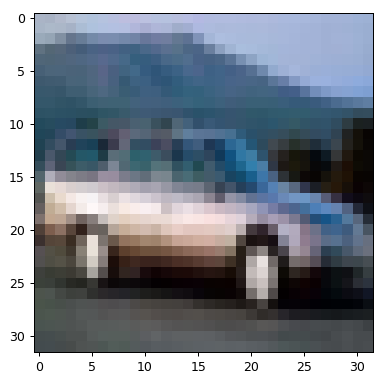

In [48]:
print("Ground truth: {}".format(y_train[4]))
plt.imshow(x_train[4])

##### We should normalize our data to prevent the gradient from varying wildly between images

In [49]:
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

##### We'll also need to flatten the inputs for our feedforward network

In [50]:
flat_image_length = np.prod(np.shape(x_train[4]))
ff_x_train = x_train.reshape(x_train.shape[0], flat_image_length)
ff_x_test = x_test.reshape(x_test.shape[0], flat_image_length)
print("Now the image set is {} images as {}-length vectors".format(np.shape(ff_x_train)[0],np.shape(ff_x_train)[1]))

Now the image set is 50000 images as 3072-length vectors


##### We additionally would like the labels to be one-hot-encoded

In [51]:
print(y_train[0])
y_train = ku.to_categorical(y_train)
y_test = ku.to_categorical(y_test)
print(y_train[0])

[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


#### Write a function to build our model architecture

In [52]:
def get_feedforward_neural_net(numnodes):
    model = km.Sequential()
    model.add(kl.Dense(numnodes, input_dim=3072, activation='sigmoid'))
    model.add(kl.Dense(10, activation='softmax'))
    return model

#### Let's build this model and train it!

In [53]:
ffNN = get_feedforward_neural_net(100)
ffNN.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

In [54]:
ffNN_fit = ffNN.fit(ff_x_train, y_train, batch_size=256, epochs=10, verbose=1, validation_data=(ff_x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 13s 251us/step - loss: 0.0963 - acc: 0.1075 - val_loss: 0.0947 - val_acc: 0.1137-
Epoch 2/10
50000/50000 [==============================] - 4s 82us/step - loss: 0.0938 - acc: 0.1121 - val_loss: 0.0928 - val_acc: 0.1202
Epoch 3/10
50000/50000 [==============================] - 4s 77us/step - loss: 0.0922 - acc: 0.1254 - val_loss: 0.0915 - val_acc: 0.1408
Epoch 4/10
50000/50000 [==============================] - 4s 78us/step - loss: 0.0910 - acc: 0.1485 - val_loss: 0.0904 - val_acc: 0.1707
Epoch 5/10
50000/50000 [==============================] - 4s 85us/step - loss: 0.0901 - acc: 0.1736 - val_loss: 0.0896 - val_acc: 0.1927
Epoch 6/10
50000/50000 [==============================] - 4s 80us/step - loss: 0.0894 - acc: 0.1918 - val_loss: 0.0889 - val_acc: 0.2063
Epoch 7/10
50000/50000 [==============================] - 4s 73us/step - loss: 0.0887 - acc: 0.2046 - val_loss: 0.0883 - val_

## Example 2: <a id='linkcnn'></a>

### A Convolutional Neural Network

##### We will use the same CIFAR10 dataset but we will use the original 32x32x3 images rather than the flattened images.
##### Define the CNN architecture we want to use

In [56]:
def get_convolutional_neural_net(num_feature_maps, numnodes, input_size = 32, output_size = 10):
    model = km.Sequential()
    
    #Note that the dimensions are in 'channels_last' format (ie. length x width x number of colours)
    model.add(kl.Conv2D(num_feature_maps, kernel_size = (5, 5), 
                        input_shape = (input_size, input_size, 3), activation = "relu"))
    model.add(kl.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

    # In theory, this prevents overfitting.
    model.add(kl.Dropout(0.1))
    
    model.add(kl.Flatten())
    model.add(kl.Dense(numnodes, activation = "relu"))
    model.add(kl.Dense(10, activation = "softmax"))
       
    # Return the model.
    return model

#### Let's build this CNN and train it!

In [57]:
CNN = get_convolutional_neural_net(50, 200)
CNN.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [58]:
CNN.fit(x_train, y_train, batch_size=256, epochs=2, verbose=1, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 86s 2ms/step - loss: 1.8823 - acc: 0.3321 - val_loss: 1.6781 - val_acc: 0.4114
Epoch 2/10
50000/50000 [==============================] - 84s 2ms/step - loss: 1.5876 - acc: 0.4417 - val_loss: 1.5328 - val_acc: 0.4513
Epoch 3/10
50000/50000 [==============================] - 83s 2ms/step - loss: 1.4439 - acc: 0.4948 - val_loss: 1.4066 - val_acc: 0.4966
Epoch 4/10
50000/50000 [==============================] - 89s 2ms/step - loss: 1.3530 - acc: 0.5241 - val_loss: 1.3565 - val_acc: 0.5162
Epoch 5/10
50000/50000 [==============================] - 86s 2ms/step - loss: 1.2929 - acc: 0.5475 - val_loss: 1.2959 - val_acc: 0.5437
Epoch 6/10
50000/50000 [==============================] - 84s 2ms/step - loss: 1.2451 - acc: 0.5643 - val_loss: 1.2456 - val_acc: 0.5659
Epoch 7/10
50000/50000 [==============================] - 84s 2ms/step - loss: 1.2077 - acc: 0.5780 - val_loss: 1.2169 - val_acc